In [29]:
import tensorflow as tf

import time
tf.get_logger().setLevel(40) # suppress deprecation messages
tf.compat.v1.disable_v2_behavior() # disable TF2 behaviour as alibi code still relies on TF1 constructs

%matplotlib inline
import matplotlib.pyplot as plt

from tslearn.neighbors import KNeighborsTimeSeries, KNeighborsTimeSeriesClassifier
from sklearn.metrics import accuracy_score


In [30]:
import os

# === CONFIG ===
data_dir = '../../data/raw/data/'  # Change this to your folder path

# === LINE COUNTER ===
for fname in os.listdir(data_dir):
    if fname.endswith('.csv'):
        file_path = os.path.join(data_dir, fname)
        with open(file_path, 'r') as f:
            num_lines = sum(1 for line in f) - 1  # subtract 1 if there's a header
        print(f"{fname}: {num_lines} lines")


1986-01-15_05-54.csv: 961 lines
1986-01-15_19-57.csv: 961 lines
1986-01-16_15-16.csv: 961 lines
1986-02-03_19-37.csv: 961 lines
1986-02-03_21-25.csv: 1221 lines
1986-02-04_09-27.csv: 961 lines
1986-02-05_05-50.csv: 1606 lines
1986-02-05_23-00.csv: 2306 lines
1986-02-07_01-00.csv: 2721 lines
1986-02-10_09-00.csv: 2701 lines
1986-02-11_02-32.csv: 961 lines
1986-02-11_22-03.csv: 961 lines
1986-02-13_01-46.csv: 961 lines
1986-02-14_02-20.csv: 3496 lines
1986-02-16_14-20.csv: 1891 lines
1986-03-03_04-00.csv: 961 lines
1986-03-05_06-06.csv: 961 lines
1986-03-06_06-25.csv: 1061 lines
1986-04-23_23-39.csv: 961 lines
1986-04-26_15-37.csv: 961 lines
1986-05-04_01-00.csv: 1126 lines
1986-10-18_23-15.csv: 961 lines
1987-04-05_18-31.csv: 961 lines
1987-04-15_06-36.csv: 961 lines
1987-04-16_14-44.csv: 961 lines
1987-05-19_17-08.csv: 961 lines
1987-05-21_02-15.csv: 961 lines
1987-05-24_14-18.csv: 961 lines
1987-05-25_02-30.csv: 961 lines
1987-05-26_18-41.csv: 961 lines
1987-05-29_05-25.csv: 1281 line

In [31]:
import os
import pandas as pd

  # your CSV folder path
expected_cols = 10  # expected number of columns
data_dir = '../../data/raw/data/'
for fname in os.listdir(data_dir):
    if fname.endswith('.csv'):
        file_path = os.path.join(data_dir, fname)
        df = pd.read_csv(file_path, nrows=1)
        num_columns = len(df.columns)
        if num_columns != expected_cols:
            print(f"{fname} has {num_columns} columns (expected {expected_cols})")


1986-02-03_21-25.csv has 6 columns (expected 10)
1986-02-05_05-50.csv has 6 columns (expected 10)
1986-02-05_23-00.csv has 6 columns (expected 10)
1986-02-07_01-00.csv has 6 columns (expected 10)
1986-02-10_09-00.csv has 6 columns (expected 10)
1986-02-14_02-20.csv has 6 columns (expected 10)
1986-02-16_14-20.csv has 6 columns (expected 10)
1986-03-06_06-25.csv has 6 columns (expected 10)
1986-05-04_01-00.csv has 6 columns (expected 10)
1987-05-29_05-25.csv has 6 columns (expected 10)
1987-11-07_19-50.csv has 6 columns (expected 10)
1987-12-29_14-15.csv has 6 columns (expected 10)
1988-01-02_15-55.csv has 6 columns (expected 10)
1988-03-25_10-50.csv has 6 columns (expected 10)
1988-06-14_17-20.csv has 6 columns (expected 10)
1988-06-29_23-25.csv has 6 columns (expected 10)
1988-07-19_19-00.csv has 6 columns (expected 10)
1988-07-26_09-40.csv has 6 columns (expected 10)
1988-08-25_01-55.csv has 6 columns (expected 10)
1988-09-27_09-20.csv has 6 columns (expected 10)
1988-10-04_20-55.csv

In [32]:
import os
import pandas as pd

data_dir = '../../data/raw/data/'  # your CSV folder path

for fname in os.listdir(data_dir):
    if fname.endswith('.csv'):
        file_path = os.path.join(data_dir, fname)
        try:
            df = pd.read_csv(file_path)
            num_rows = len(df)
            print(f"{fname}: {num_rows} rows")
        except Exception as e:
            print(f"Error reading {fname}: {e}")


1986-01-15_05-54.csv: 961 rows
1986-01-15_19-57.csv: 961 rows
1986-01-16_15-16.csv: 961 rows
1986-02-03_19-37.csv: 961 rows
1986-02-03_21-25.csv: 1221 rows
1986-02-04_09-27.csv: 961 rows
1986-02-05_05-50.csv: 1606 rows
1986-02-05_23-00.csv: 2306 rows
1986-02-07_01-00.csv: 2721 rows
1986-02-10_09-00.csv: 2701 rows
1986-02-11_02-32.csv: 961 rows
1986-02-11_22-03.csv: 961 rows
1986-02-13_01-46.csv: 961 rows
1986-02-14_02-20.csv: 3496 rows
1986-02-16_14-20.csv: 1891 rows
1986-03-03_04-00.csv: 961 rows
1986-03-05_06-06.csv: 961 rows
1986-03-06_06-25.csv: 1061 rows
1986-04-23_23-39.csv: 961 rows
1986-04-26_15-37.csv: 961 rows
1986-05-04_01-00.csv: 1126 rows
1986-10-18_23-15.csv: 961 rows
1987-04-05_18-31.csv: 961 rows
1987-04-15_06-36.csv: 961 rows
1987-04-16_14-44.csv: 961 rows
1987-05-19_17-08.csv: 961 rows
1987-05-21_02-15.csv: 961 rows
1987-05-24_14-18.csv: 961 rows
1987-05-25_02-30.csv: 961 rows
1987-05-26_18-41.csv: 961 rows
1987-05-29_05-25.csv: 1281 rows
1987-07-24_08-53.csv: 961 row

In [34]:
import os
import pandas as pd

data_dir = '../../data/raw/data/'
files_with_4000_rows = []
label_file = '../../data/raw/class_labels.csv'

max_rows=0
df_labels = pd.read_csv(label_file)
label_map = dict(zip(df_labels['File'], df_labels['Label']))
for fname in os.listdir(data_dir):
    if fname.endswith('.csv'):
        file_path = os.path.join(data_dir, fname)
        try:
            df = pd.read_csv(file_path)
            num_rows = len(df)
            if num_rows<=4000:
                files_with_4000_rows.append((fname,num_rows))
        except Exception as e:
            print(f"Error reading {fname}: {e}")

# Print the result
files_with_4000_rows=sorted(files_with_4000_rows,key=lambda x: x[1])
# print("\nFiles with <=4000 rows:")
# for (f,nr) in files_with_4000_rows:
#     if f!='1991-07-01_19-14.csv':
#         print(f,nr,label_map[f])


# Optional: print total count
print(f"\nTotal files with <=4000 rows: {len(files_with_4000_rows)}, max_rows{max_rows}")



Total files with <=4000 rows: 2846, max_rows0


In [36]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tslearn.utils import to_time_series_dataset

label_file = '../../data/raw/class_labels.csv'
data_dir = '../../data/raw/data/'

df_labels = pd.read_csv(label_file)
label_map = dict(zip(df_labels['File'], df_labels['Label']))

X = []
y = []
cols_to_keep = ['p3_flux_ic'] #, 'p5_flux_ic', 'p7_flux_ic', 'long'
timestamps_list=[]
filenames=[]
for (fname,nr) in files_with_4000_rows:
    if fname.endswith('.csv') and fname in label_map and fname!='2005-09-07_14-25.csv' :
        file_path = os.path.join(data_dir, fname)
        ts_df = pd.read_csv(file_path)

        ts_selected = ts_df.reindex(columns=cols_to_keep, fill_value=np.nan)
        ts_data = ts_selected.astype(float).values
        X.append(ts_selected)
        y.append(label_map[fname])
        filenames.append(fname)

# shape: (n_samples, n_timestamps, n_features)
X = to_time_series_dataset(X)  # will pad with NaN if needed
X[np.isnan(X)] = 0
y = np.array(y)


In [37]:
from sklearn.model_selection import train_test_split# First split
X_temp, X_test, y_temp, y_test, filenames_temp, filenames_test = train_test_split(
    X, y, filenames, test_size=0.33, random_state=42, stratify=y
)
# Second split
X_train, X_val, y_train, y_val, filenames_train, filenames_val = train_test_split(
    X_temp, y_temp, filenames_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [38]:
# from sklearn.model_selection import train_test_split
# # First split: 33% test, 67% remain
# X_temp, X_test, y_temp, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42, stratify=y
# )
#
# # Second split: 50% of remaining (i.e., 33% of original) for validation
# X_train, X_val, y_train, y_val = train_test_split(
#     X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
# )

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)



Train shape: (953, 3926, 1)
Validation shape: (953, 3926, 1)
Test shape: (939, 3926, 1)


In [ ]:
from tslearn.neighbors import KNeighborsTimeSeries, KNeighborsTimeSeriesClassifier
import joblib
model = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw",)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
joblib.dump(model, '../../models/KNN_1_TS__classifier_v1.1.pkl')

['../../models/KNN_1_TS__classifier.pkl']

In [39]:
import joblib
model = joblib.load('../../models/KNN_1_TS__classifier.pkl')

In [40]:
print("Model metric:", model.metric)  # Should print 'dtw'
print("Model _X_fit shape:", model._X_fit.shape)  # Should match X_train.shape (3D)
print("Type of model._X_fit:", type(model._X_fit))


Model metric: dtw
Model _X_fit shape: (953, 953)
Type of model._X_fit: <class 'numpy.ndarray'>


In [25]:
from sklearn.metrics import accuracy_score
from scripts.SEP_CFE_functions import *
y_pred = model.predict(X_test)
print(f"Accuracy Score:{accuracy_score(y_test, y_pred)}")
print(f"TSS:{TSS(y_test, y_pred)}")
print(f"HSS:{HSS(y_test, y_pred)}")

KeyboardInterrupt: 

In [102]:
#finding the nearest unlike neighbour. NB will need to account for regularization
def native_guide_retrieval(query, predicted_label, distance, n_neighbors):

    df = pd.DataFrame(y_train, columns = ['label'])
    df.index.name = 'index'
    #df[df['label'] == 1].index.values, df[df['label'] != 1].index.values

    ts_length = X_train.shape[1]

    knn = KNeighborsTimeSeries(n_neighbors=n_neighbors, metric = distance)

    knn.fit(X_train[list(df[df['label'] != predicted_label].index.values)])

    dist,ind = knn.kneighbors(query.reshape(1,ts_length), return_distance=True)
    return dist[0], df[df['label'] != predicted_label].index[ind[0][:]]

In [ ]:
native_guide_retrieval(X_test[100], y_pred[100], 'dtw', 1)

In [ ]:
y_train[?], y_test[100], y_pred[100]

In [ ]:
knn = KNeighborsTimeSeries(n_neighbors=1, metric='dtw').fit(X_train)
knn.kneighbors(X_test[100].reshape(1,-1), return_distance=True)

In [ ]:
np.where(y_test != y_pred)

In [ ]:
y_train[?]

In [ ]:
# ===Find the nearest neighbour of the query instance with smallest DTW=== #
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X_test[100], label = 'SEP Event p3_flux_ic(Class = SEP Event')
plt.plot(X_train[?], label = '1-NN: (Class = SEP Event)')
plt.legend()

In [ ]:
# ===Find the nearest neighbour of the query instance with opposite class(Native Guide)=== #
plt.figure(figsize=(8,5))
plt.plot(X_test[100], label = 'SEP Event p3_flux_ic(Class = SEP Event')
plt.plot(X_train[?], c='red', label='In-Sample CF: (Class = No SEP Event)')
plt.legend()

In [109]:
native_guide_retrieval(X_test[12], y_pred[12], 'dtw', 1)

C:\Users\Pranjal\anaconda3\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn(


(array([112.30365936]), Index([512], dtype='int64', name='index'))

In [110]:
y_pred[12], y_train[512], y_test[12]

(1, 0, 1)

In [111]:
knn = KNeighborsTimeSeries(n_neighbors=1, metric='dtw').fit(X_train)
knn.kneighbors(X_test[12].reshape(1,-1), return_distance=True)

C:\Users\Pranjal\anaconda3\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn(


(array([[63.89442743]]), array([[401]], dtype=int64))

In [112]:
np.where(y_test != y_pred)

(array([148, 278, 281, 322, 361, 654, 788, 902, 932], dtype=int64),)

In [117]:
y_train[401]

1

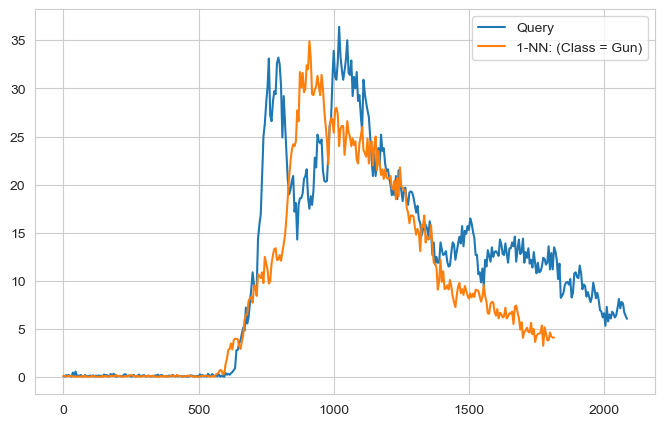

In [115]:
# ===Find the nearest neighbour of the query instance with smallest DTW=== #
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X_test[12], label = 'SEP Event p3_flux_ic(Class = SEP Event')
plt.plot(X_train[401], label = '1-NN: (Class = SEP Event)')
plt.legend()

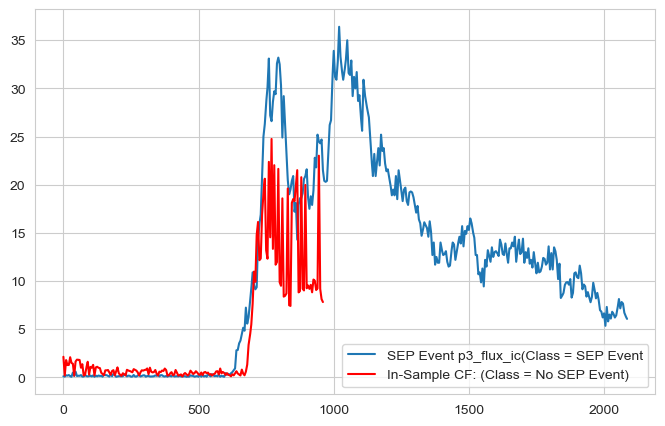

In [118]:
# ===Find the nearest neighbour of the query instance with opposite class(Native Guide)=== #
plt.figure(figsize=(8,5))
plt.plot(X_test[12], label = 'SEP Event p3_flux_ic(Class = SEP Event')
plt.plot(X_train[512], c='red', label='In-Sample CF: (Class = No SEP Event)')
plt.legend()

In [125]:
from tslearn.barycenters import dtw_barycenter_averaging

# Get all training series with label = target class
class_series = X_train[y_train == 1]

# Compute the barycenter (average) for that class
barycenter = dtw_barycenter_averaging(class_series)


MemoryError: Allocation failed (probably too large).